In [26]:
import tensorflow as tf ##jika error,  install tensorflow terlebih dahulu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import random

seed_value = 33
tf.random.set_seed(seed_value) 
np.random.seed(seed_value)      
random.seed(seed_value)  


In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_labels)

10000

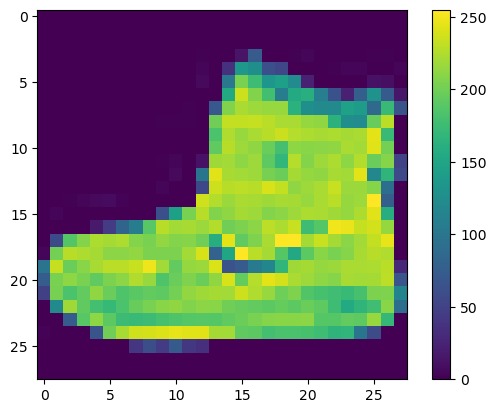

In [33]:
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False)
plt.show() 

In [34]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

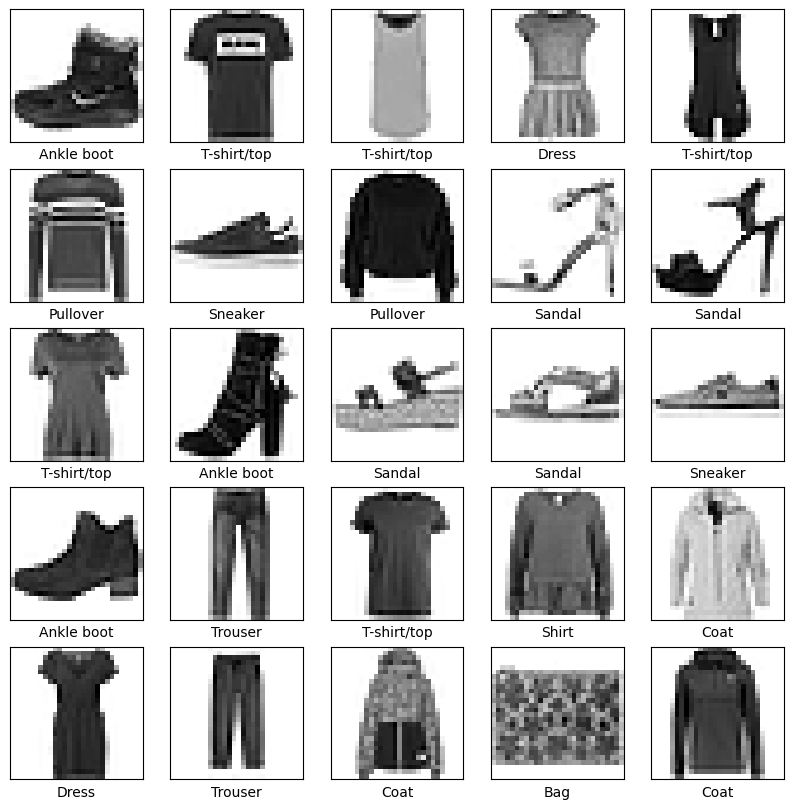

In [35]:
plt.figure(figsize=(10,10)) 
for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]]) 
plt.show()

In [36]:
model_tf = tf.keras.Sequential([ 
    tf.keras.layers.Input(shape=(28,28)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='relu'),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [37]:
model_tf.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])  
            

In [38]:
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience = 5,
    min_delta = 0.0001,
    restore_best_weights=True
)


history = model_tf.fit(
    train_images, train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/40


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7385 - loss: 0.7255 - val_accuracy: 0.8317 - val_loss: 0.4616
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8373 - loss: 0.4450 - val_accuracy: 0.8532 - val_loss: 0.4090
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8505 - loss: 0.4086 - val_accuracy: 0.8643 - val_loss: 0.3805
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8605 - loss: 0.3824 - val_accuracy: 0.8614 - val_loss: 0.3725
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 0.3722 - val_accuracy: 0.8676 - val_loss: 0.3680
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8697 - loss: 0.3590 - val_accuracy: 0.8705 - val_loss: 0.3569
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8701 - loss: 0.3480 - val_accuracy: 0.8710 - val_loss: 0.3520
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8717 - loss: 0.3435 - val_accurac

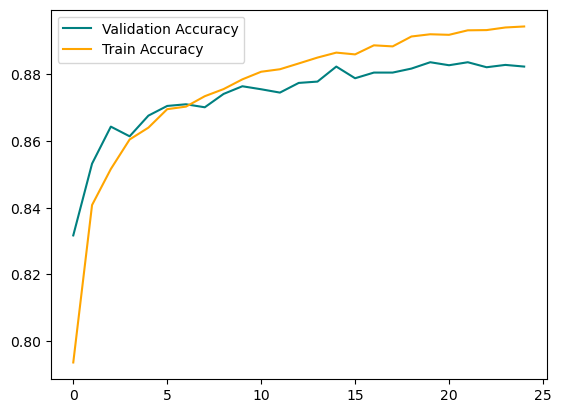

In [39]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')  
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend(loc='upper left')
plt.show()  

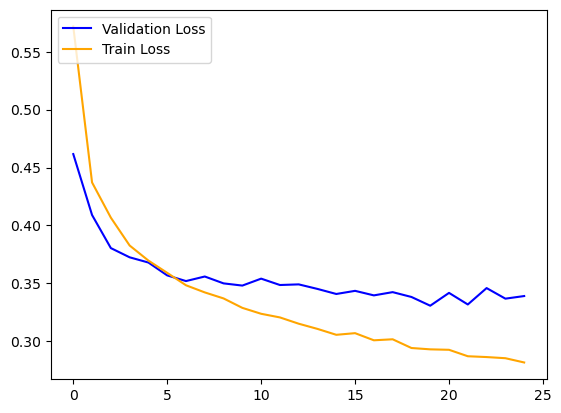

In [40]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')  
plt.plot(history.history['loss'], color='orange', label='Train Loss')
plt.legend(loc='upper left')
plt.show()  

In [41]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose=2) 
																				
print('\nTest accuracy:', test_acc_tf) 

313/313 - 0s - 665us/step - accuracy: 0.8836 - loss: 0.3307

Test accuracy: 0.8835999965667725


In [42]:
probablity_model = tf.keras.Sequential([model_tf, tf.keras.layers.Softmax()])

In [43]:
predictions_tf = probablity_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


In [44]:
predictions_tf[0]

array([3.7439065e-08, 7.5913373e-09, 1.8997048e-09, 1.6653831e-09,
       1.1828543e-09, 1.6907828e-04, 7.1153963e-09, 2.2974147e-03,
       6.5626282e-09, 9.9753344e-01], dtype=float32)

In [45]:
np.argmax(predictions_tf[0])

9

In [46]:
test_labels[0]

9

In [49]:
def plot_image(i, predictions_array, true_label, img):  
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label): 
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

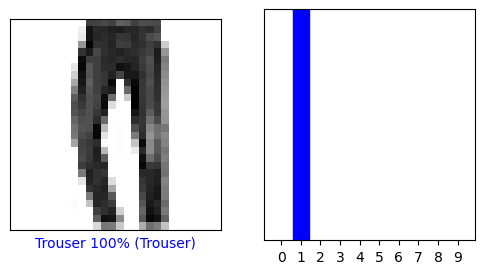

In [51]:
i = 5 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_tf[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_tf[i],  test_labels)
plt.show()

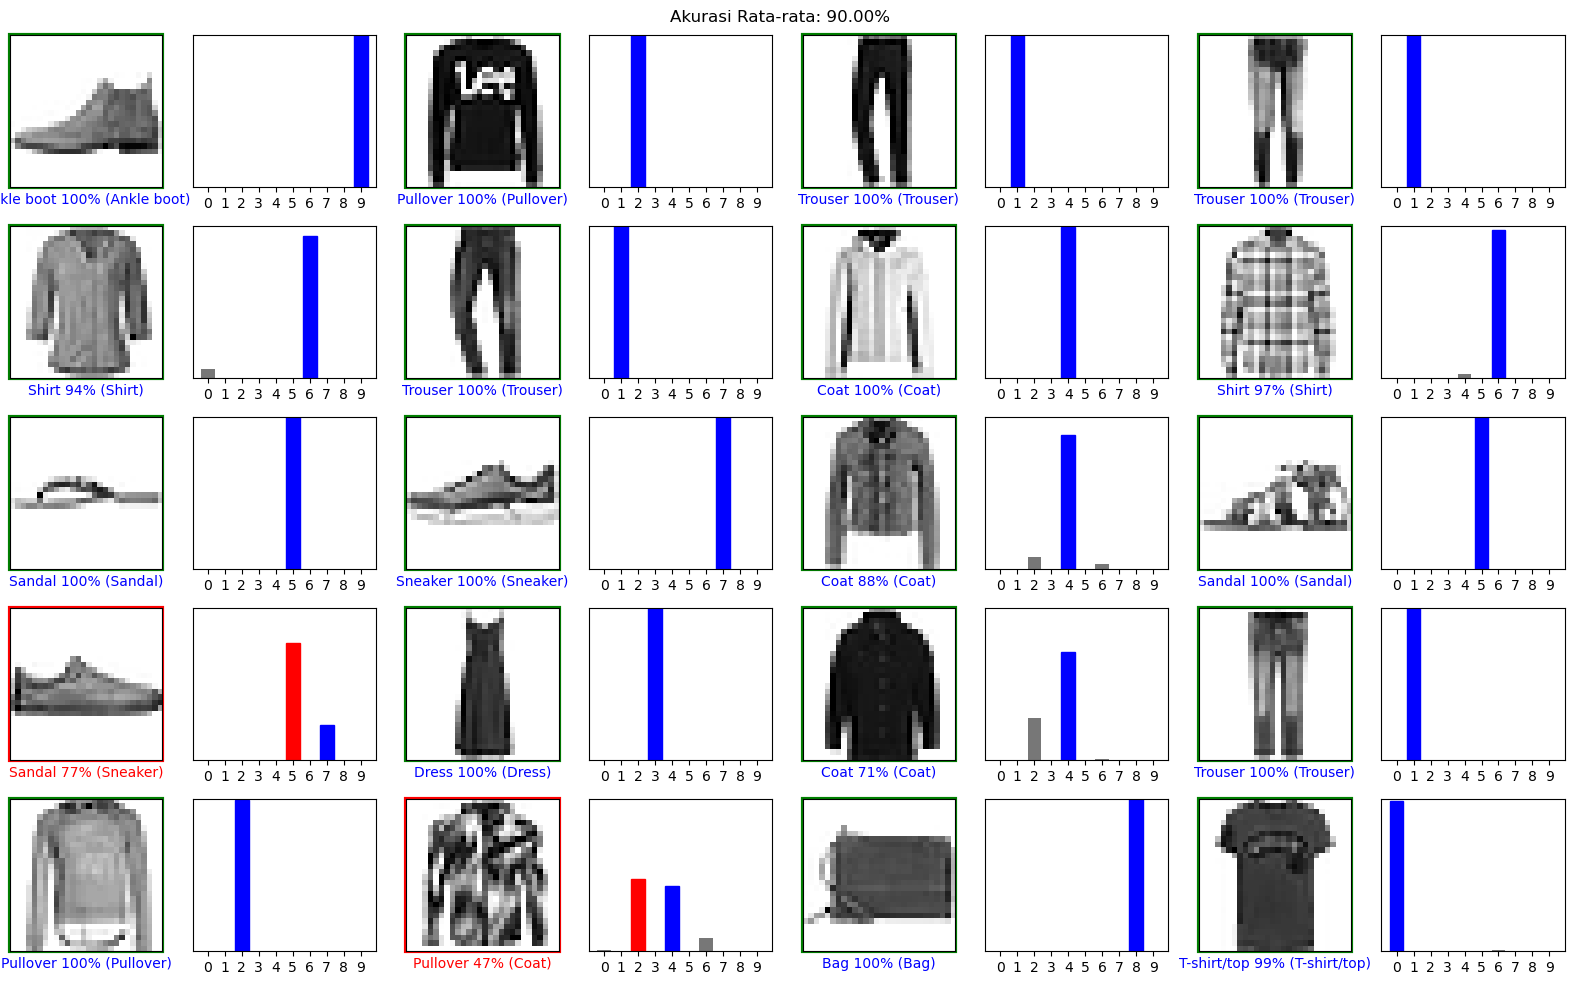

In [52]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100  

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels, test_images)
    
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

In [53]:
img = test_images[1]

print(img.shape)

(28, 28, 1)


In [54]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [55]:
predictions_single = probablity_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.0441709e-05 1.9904907e-12 9.9864131e-01 2.7874933e-12 6.9430092e-04
  4.4580403e-19 6.5388146e-04 6.0752655e-20 4.5801855e-13 1.9190660e-23]]


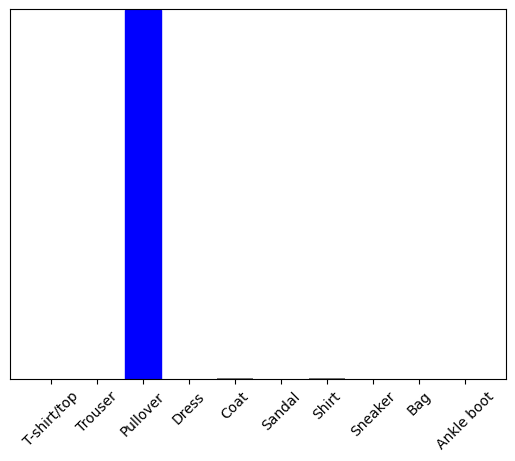

In [56]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [57]:
np.argmax(predictions_single[0])

2

In [58]:
df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_tf, axis=1),  
    'Proba_0': predictions_tf[:, 0],  
    'Proba_1': predictions_tf[:, 1]  
})

pixels = test_images.reshape(len(test_images), -1)

df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28*28)])

df_test = pd.concat([df_test, df_pixels], axis=1)

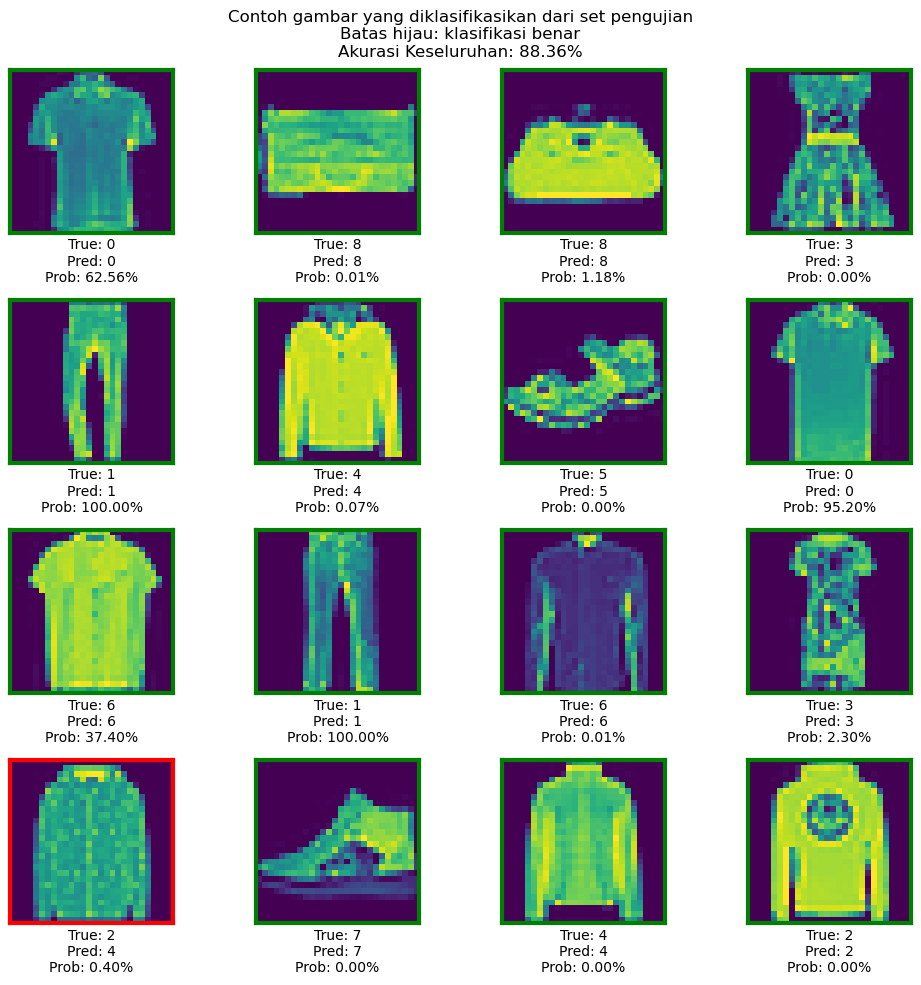

In [60]:
df_plot = df_test.sample(16, random_state=33).copy()
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):

    
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]
    
    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100

    true_class = df_plot['Target'].values[i]

    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)

    axi.imshow(pixels, cmap='viridis')
    axi.set(xticks=[], yticks=[],
    xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")

    edge_color = 'green' if predicted_class == true_class else 'red'
    
    axi.spines[:].set_color(edge_color)
    axi.spines[:].set_linewidth(3)


fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf


In [62]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [63]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)


train_images = fashion_mnist.data[:60000]
train_labels = fashion_mnist.target[:60000].astype('int')
test_images = fashion_mnist.data[60000:]
test_labels = fashion_mnist.target[60000:].astype('int')

In [64]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data
train_images_split, val_images, train_labels_split, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=33)

model_sklearn = MLPClassifier(hidden_layer_sizes=(128,300),
                      activation='relu',
                      alpha=0.0001,
                      learning_rate_init=0.001,
                      early_stopping=True,
                      validation_fraction=0.2,
                      n_iter_no_change=10,
                      random_state=33,
                      verbose=True)

model_sklearn.fit(train_images_split, train_labels_split)
training_loss = model_sklearn.loss_curve_

Iteration 1, loss = 0.61734263
Validation score: 0.844375
Iteration 2, loss = 0.41081211
Validation score: 0.866667
Iteration 3, loss = 0.36422123
Validation score: 0.873750
Iteration 4, loss = 0.33605270
Validation score: 0.876146
Iteration 5, loss = 0.31360398
Validation score: 0.879687
Iteration 6, loss = 0.29580410
Validation score: 0.870833
Iteration 7, loss = 0.28336250
Validation score: 0.877500
Iteration 8, loss = 0.26955578
Validation score: 0.886354
Iteration 9, loss = 0.25887624
Validation score: 0.883021
Iteration 10, loss = 0.25071059
Validation score: 0.882812
Iteration 11, loss = 0.23699424
Validation score: 0.890312
Iteration 12, loss = 0.23207101
Validation score: 0.891563
Iteration 13, loss = 0.22406745
Validation score: 0.890625
Iteration 14, loss = 0.21388797
Validation score: 0.890833
Iteration 15, loss = 0.20669874
Validation score: 0.892083
Iteration 16, loss = 0.19853319
Validation score: 0.887708
Iteration 17, loss = 0.19480450
Validation score: 0.889375
Iterat

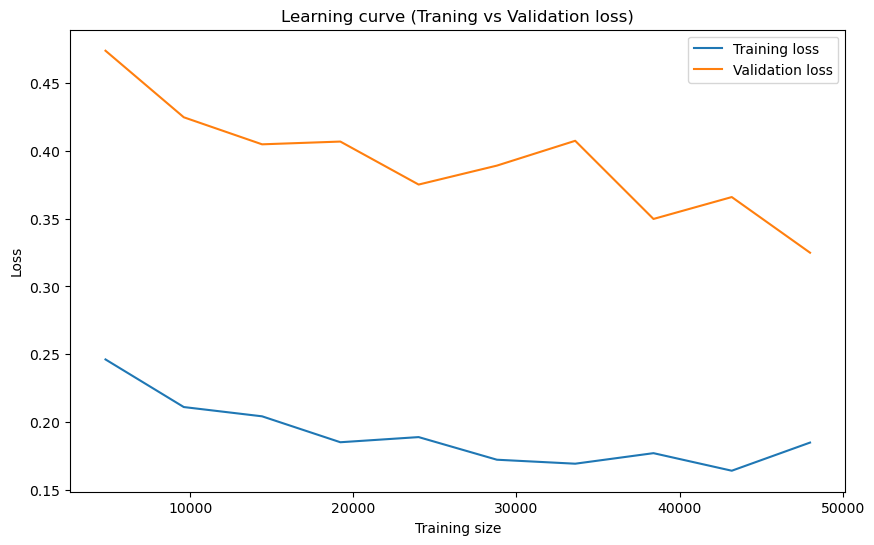

In [67]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn, train_images, train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='neg_log_loss', random_state=33 ,n_jobs=-1)

train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_loss_mean, label='Training loss')
plt.plot(train_sizes, val_loss_mean, label='Validation loss')
plt.xlabel('Training size')
plt.ylabel('Loss')
plt.title('Learning curve (Traning vs Validation loss)')
plt.legend()
plt.show()

In [68]:
test_predictions = model_sklearn.predict(test_images)
test_acc_skelarn = accuracy_score(test_labels, test_predictions)
print('\nTest accuracy:', test_acc_skelarn)



Test accuracy: 0.8868


In [69]:
print("\nClassification report:", classification_report(test_labels, test_predictions))

predictions_proba = model_sklearn.predict_proba(test_images)




Classification report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.90      0.89      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.73      0.67      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [70]:
predictions_skelearn = model_sklearn.predict_proba(test_images)
print(predictions_skelearn[0])
print("Predicted label for first iamges:", np.argmax(predictions_skelearn[0]))

print("Actual label for first images:", test_labels.iloc[0])


[6.15048421e-09 2.31776052e-09 8.94655065e-08 1.14538799e-08
 1.91679249e-08 9.54491749e-05 2.00067116e-08 1.03633895e-02
 3.25652188e-09 9.89541010e-01]
Predicted label for first iamges: 9
Actual label for first images: 9


In [72]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28) 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i] 
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

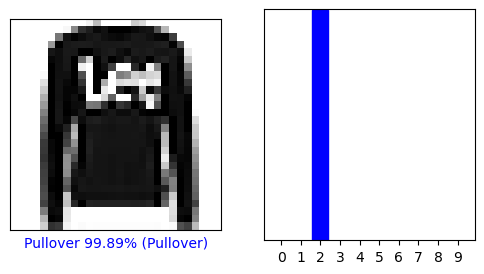

In [74]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_skelearn[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_skelearn[i], test_labels)
plt.show()

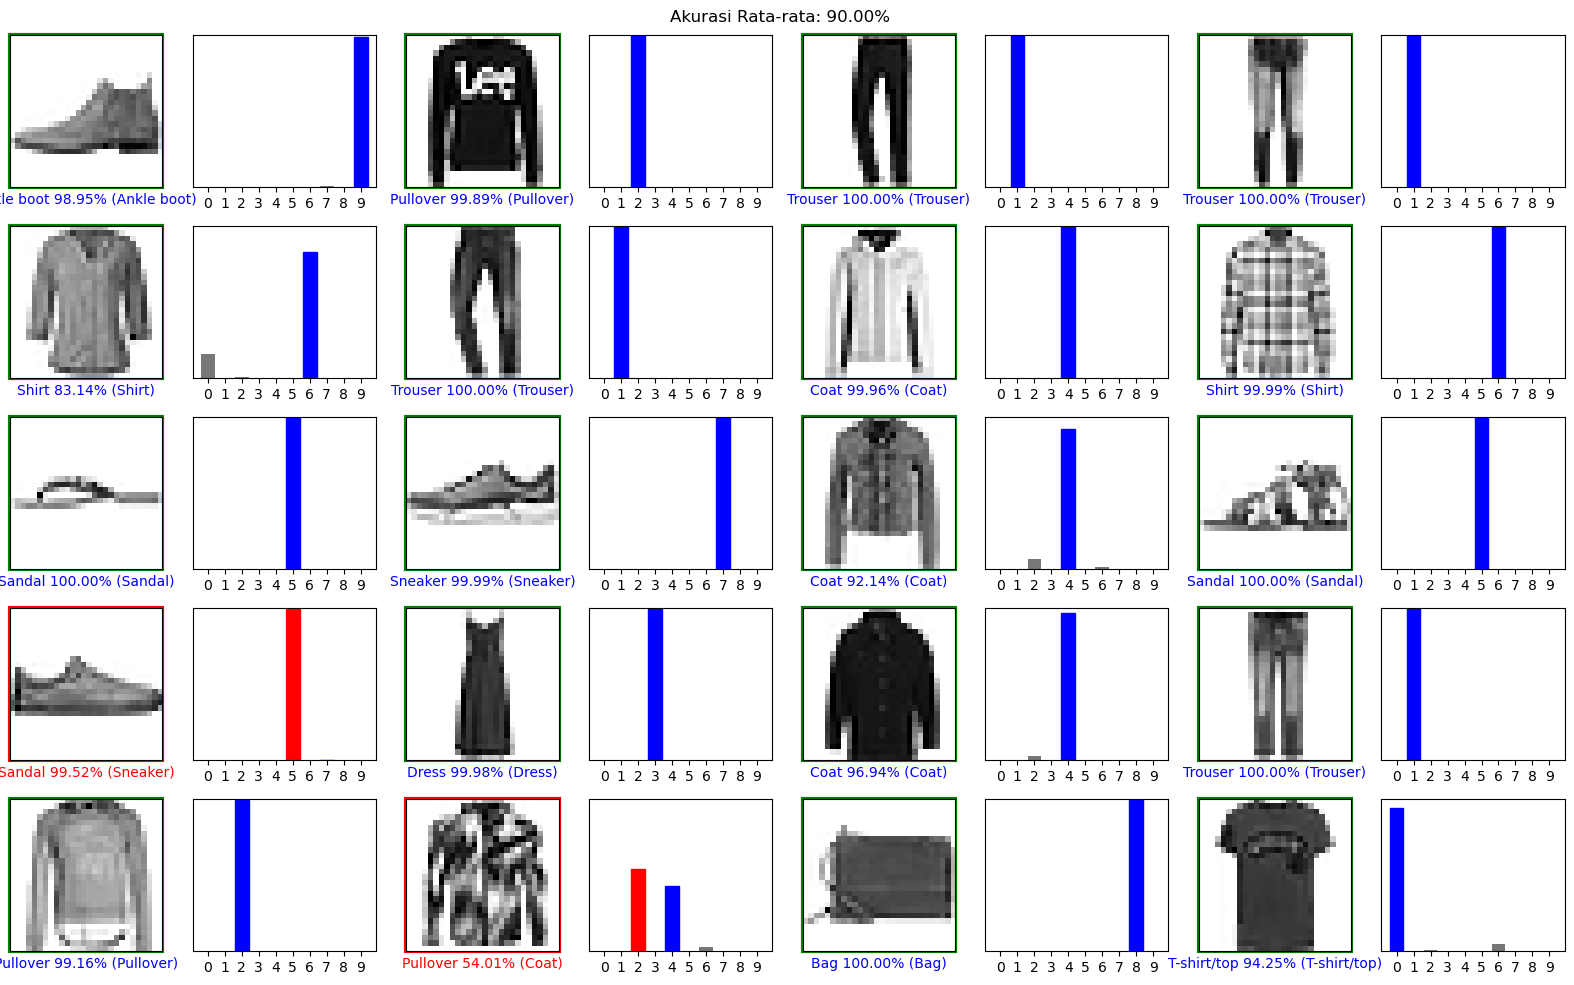

In [76]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_skelearn[i]) == test_labels.iloc[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_skelearn[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    
    plot_value_array(i, predictions_skelearn[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

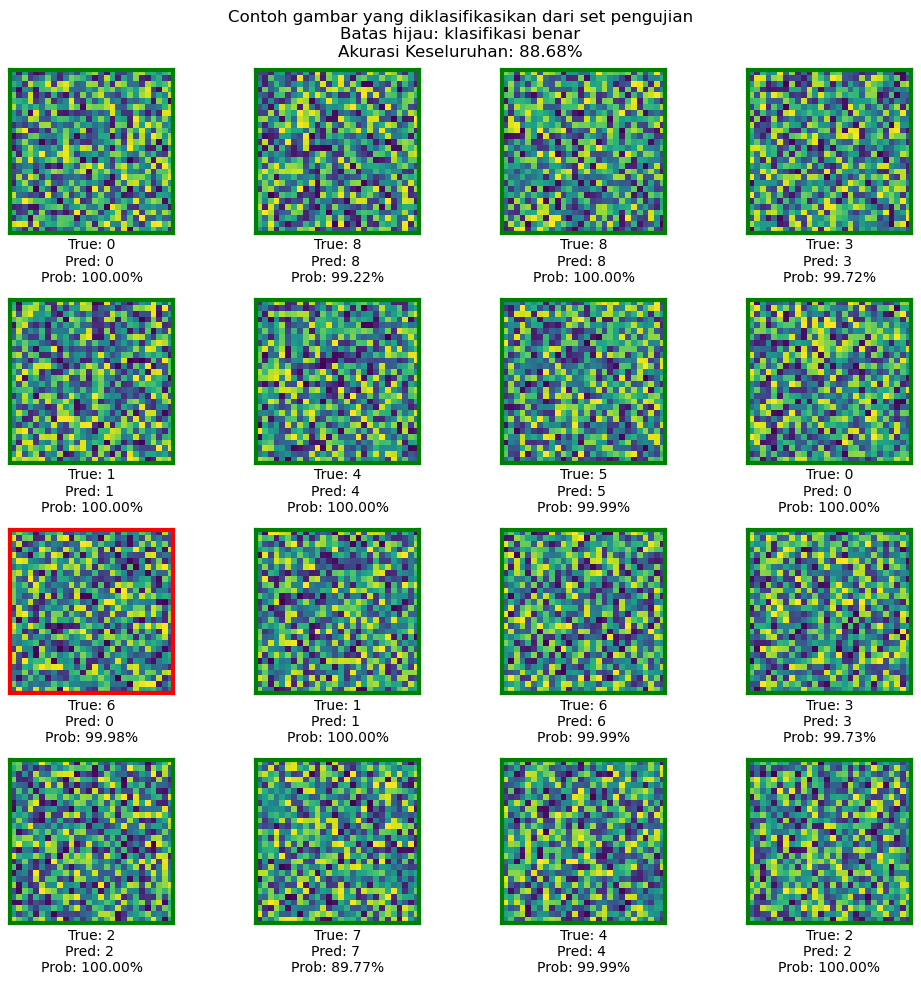

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 10000

df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_skelearn, axis=1),
    'Proba_0': predictions_skelearn[:, 0],
    'Proba_1': predictions_skelearn[:, 1]
})

df_test['Proba_0'] = df_test['Proba_0'] / (df_test['Proba_0'] + df_test['Proba_1'])

df_test['Proba_1'] = 1 - df_test['Proba_0']

for i in range(1, 28*28 + 1):
    df_test[f'pixel{i}'] = np.random.randint(0, 256, n_samples)

df_plot = df_test.sample(16, random_state=33).copy()
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]
    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100
    true_class = df_plot['Target'].values[i]
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')
    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class} \nProb: {prediction_probability:.2f}%")
    edge_color = 'green' if predicted_class == true_class else 'red'
    for spine in axi.spines.values():
        spine.set_edgecolor(edge_color)
        spine.set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

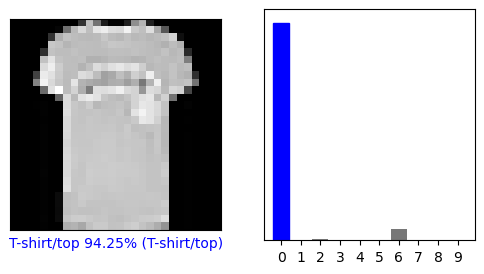

In [78]:


import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 19
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_skelearn[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_skelearn[i], test_labels)
plt.show()

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def save_image_only(i, true_label, img):
    img = img.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.savefig(f'img_only_{i}_true_{true_label}.jpeg', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    
i = 19
save_image_only(i, test_labels.iloc[i], test_images)

In [80]:
import numpy as np


data = {
    'Model': ['TensorFlow', 'Scikit-learn'],
    'Accuracy': [test_acc_tf, test_acc_skelarn],
    'Architecture': ['Neural Network (2 Hidden Layer)', 'MLP (2 Hidden Layer)'],
    'Early Stopping': ['Yes', 'Yes'],
}

comparison_df = pd.DataFrame(data)

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

print("Comparison of Model Performance")
print(comparison_df)

print("\nBest Model Based on Accuracy")
print(best_model)

Comparison of Model Performance
          Model  Accuracy                     Architecture Early Stopping
0    TensorFlow    0.8836  Neural Network (2 Hidden Layer)            Yes
1  Scikit-learn    0.8868             MLP (2 Hidden Layer)            Yes

Best Model Based on Accuracy
Model                     Scikit-learn
Accuracy                        0.8868
Architecture      MLP (2 Hidden Layer)
Early Stopping                     Yes
Name: 1, dtype: object


In [81]:
import pickle


with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_sklearn, file)